In [190]:
import pyspark
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# import relevant parts of sklearn
from sklearn import cluster, datasets
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from scipy.cluster import hierarchy

%matplotlib inline
plt.style.use('seaborn-whitegrid')

import seaborn as sns

import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)
%matplotlib inline

In [191]:
data=pd.read_csv("fulltextdata_2.csv")

In [192]:
data.head(10)

,create,geo_tag_city_name,counts,Population,INCOME,percentage,Walk_Score,Bike_Score,WORKDAY,Area,AQI_VALUE,ELEVATION,PRCP,TMAX,season,COUNT_BY_POPULATION
0,2016-01-01,Alameda,2,78246,93427,0.676553,65,73,0.0,27.5,50.271697,155.045081,0.0,57.356678,3,2.556041
1,2016-01-01,Berkeley,6,120179,114720,0.676553,81,85,0.0,27.1,50.271697,349.900000,0.0,57.356678,3,4.992553
2,2016-01-01,Dublin,4,57022,128737,0.676553,34,56,0.0,38.6,50.271697,155.045081,0.0,57.356678,3,7.014836
3,2016-01-01,Fremont,1,230964,112347,0.676553,44,49,0.0,200.6,50.271697,9.100000,0.0,57.356678,3,0.432968
4,2016-01-01,Hayward,1,156917,69415,0.676553,53,52,0.0,117.4,50.271697,155.045081,0.0,57.356678,3,0.637280
5,2016-01-01,Livermore,1,88232,111950,0.676553,37,64,0.0,65.2,41.000000,146.300000,0.0,46.000000,3,1.133376
6,2016-01-01,Newark,4,45554,91103,0.676553,47,45,0.0,35.9,50.271697,155.045081,0.0,57.356678,3,8.780788
7,2016-01-01,Oakland,8,417442,60472,0.676553,72,65,0.0,144.5,13.000000,120.400000,0.0,57.356678,3,1.916434
8,2016-01-01,San Leandro,1,89910,76781,0.676553,62,55,0.0,34.6,50.271697,155.045081,0.0,57.356678,3,1.112223
9,2016-01-01,Union City,2,74354,93050,0.676553,44,49,0.0,50.4,50.271697,155.045081,0.0,57.356678,3,2.689835


In [193]:
data=data.dropna()
data=data.drop_duplicates(['create','geo_tag_city_name'])

In [194]:
NEW=data
NEW.count()

create                 180458
geo_tag_city_name      180458
counts                 180458
Population             180458
INCOME                 180458
percentage             180458
Walk_Score             180458
Bike_Score             180458
WORKDAY                180458
Area                   180458
AQI_VALUE              180458
ELEVATION              180458
PRCP                   180458
TMAX                   180458
season                 180458
COUNT_BY_POPULATION    180458
dtype: int64

# Creat x and y (non-dummy)

In [195]:
DA=NEW.drop(columns=['Population'])
data_new_x=DA.drop(columns=['create','counts','geo_tag_city_name'])
data_new_y=DA['counts']

In [196]:
DA.head(10)

,create,geo_tag_city_name,counts,INCOME,percentage,Walk_Score,Bike_Score,WORKDAY,Area,AQI_VALUE,ELEVATION,PRCP,TMAX,season,COUNT_BY_POPULATION
0,2016-01-01,Alameda,2,93427,0.676553,65,73,0.0,27.5,50.271697,155.045081,0.0,57.356678,3,2.556041
1,2016-01-01,Berkeley,6,114720,0.676553,81,85,0.0,27.1,50.271697,349.900000,0.0,57.356678,3,4.992553
2,2016-01-01,Dublin,4,128737,0.676553,34,56,0.0,38.6,50.271697,155.045081,0.0,57.356678,3,7.014836
3,2016-01-01,Fremont,1,112347,0.676553,44,49,0.0,200.6,50.271697,9.100000,0.0,57.356678,3,0.432968
4,2016-01-01,Hayward,1,69415,0.676553,53,52,0.0,117.4,50.271697,155.045081,0.0,57.356678,3,0.637280
5,2016-01-01,Livermore,1,111950,0.676553,37,64,0.0,65.2,41.000000,146.300000,0.0,46.000000,3,1.133376
6,2016-01-01,Newark,4,91103,0.676553,47,45,0.0,35.9,50.271697,155.045081,0.0,57.356678,3,8.780788
7,2016-01-01,Oakland,8,60472,0.676553,72,65,0.0,144.5,13.000000,120.400000,0.0,57.356678,3,1.916434
8,2016-01-01,San Leandro,1,76781,0.676553,62,55,0.0,34.6,50.271697,155.045081,0.0,57.356678,3,1.112223
9,2016-01-01,Union City,2,93050,0.676553,44,49,0.0,50.4,50.271697,155.045081,0.0,57.356678,3,2.689835


# Creat x and y (dummy)

In [198]:
New_dummy['season'] = pd.get_dummies(New_dummy['season'])
New_dummy['WORKDAY'] = pd.get_dummies(New_dummy['WORKDAY'])

In [199]:
DA_1=New_dummy.drop(columns=['Population'])
data_new_1_x=DA_1.drop(columns=['create','counts','geo_tag_city_name'])
data_new_1_y=DA_1['counts']

# Linear Model

# train:test=80:20 (non dummy)

In [204]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from numpy import array
from sklearn.model_selection import KFold
X_train, X_test, y_train, y_test = train_test_split(data_new_x, data_new_y, test_size=0.2)
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test) 
#X_train, X_test, y_train, y_test = train_test_split(data_new_x, data_new_y, test_size=0.2)

In [201]:
lm.coef_

array([ 1.02101346e-05, -3.90559603e+01,  2.20684135e-01, -2.72808436e-02,
        4.17826481e-02,  9.64551558e-02, -8.40893126e-03, -1.37057319e-03,
        4.72588823e-01,  3.13337519e-02,  6.16069014e-02,  1.69913605e-01])

In [202]:
from sklearn import metrics
print(metrics.mean_squared_error(y_test, predictions))
print(np.sqrt(metrics.mean_squared_error(y_test, predictions)))

73.09971767413
8.549837289336564


In [203]:
lm.score(X_train, y_train)

0.6447965404940756

Text(0, 0.5, 'Predictions')

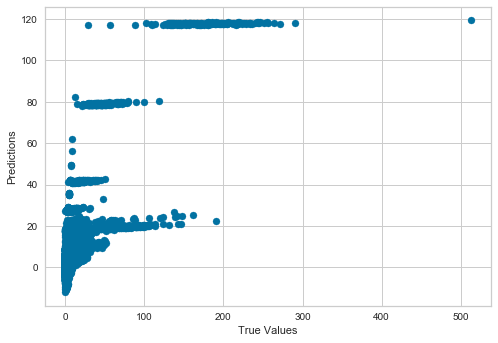

In [22]:
scat=plt.scatter(y_test,predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

# linear model (residual plots)

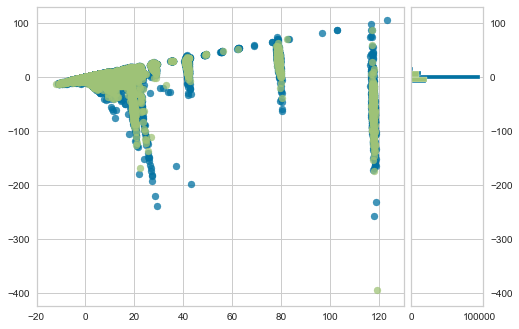

In [23]:
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot

# Instantiate the linear model and visualizer
ridge = Ridge()
visualizer = ResidualsPlot(ridge)

visualizer.fit(X_train, y_train)  # Fit the training data to the model
visualizer.score(X_test, y_test) 
ax = plt.gca()

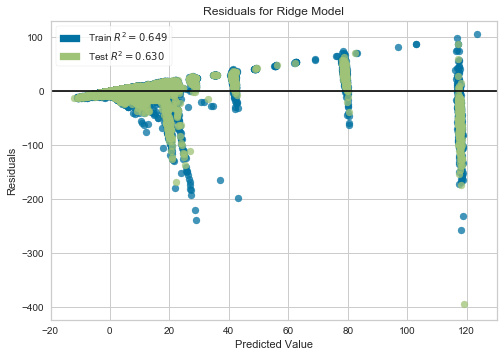

In [24]:
visualizer = ResidualsPlot(ridge, hist=False)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
ax = plt.gca()
visualizer.poof()

# Train:test=60:40 (non dummy)

In [149]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from numpy import array
from sklearn.model_selection import KFold
X_train, X_test, y_train, y_test = train_test_split(data_new_x, data_new_y, test_size=0.4)
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test) 

In [150]:
from sklearn import metrics
print(metrics.mean_squared_error(y_test, predictions))
print(np.sqrt(metrics.mean_squared_error(y_test, predictions)))

72.11814689832556
8.492240393342946


In [151]:
lm.score(X_train, y_train)

0.6502762949341939

# Train:test=80:20 (dummy)

In [169]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from numpy import array
from sklearn.model_selection import KFold
X_train, X_test, y_train, y_test = train_test_split(data_new_1_x, data_new_1_y, test_size=0.2)
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test) 

In [170]:
from sklearn import metrics
print(metrics.mean_squared_error(y_test, predictions))
print(np.sqrt(metrics.mean_squared_error(y_test, predictions)))

64.38309343808577
8.023907616497448


In [171]:
lm.score(X_train, y_train)

0.6438261102283269

# Logistic model

# train:test=75:25 (counts<2, binary, non-dummy)

In [205]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

In [206]:
y = []
for c in NEW['COUNT_BY_POPULATION']:
    if c <=2:
        y.append(0)
    else:
        y.append(1)
x = NEW.drop(columns=['create','counts','geo_tag_city_name'])
def predict(validation):
    result = []
    for i in range(len(validation)):
        posterior = validation[i][1]
        if(posterior< 0.5):
            result.append(0)
        else:
            result.append(1)
    return result
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.25)

LRmodel = LogisticRegression()
LRmodel.fit(x_train, y_train)

validation = LRmodel.predict_proba(x_valid)
prediction = predict(validation)
from sklearn import metrics
print(metrics.mean_squared_error(y_valid, prediction))
print(np.sqrt(metrics.mean_squared_error(y_valid, prediction)))

0.039831541615870554
0.1995784096937105


In [207]:
from sklearn.metrics import accuracy_score
accuracy_score(y_valid, prediction)

0.9601684583841295

# train:test=60:40 (counts<6, binary, non-dummy)

In [208]:
y = []
for c in NEW['COUNT_BY_POPULATION']:
    if c <=6:
        y.append(0)
    else:
        y.append(1)
x = NEW.drop(columns=['create','counts','geo_tag_city_name'])
def predict(validation):
    result = []
    for i in range(len(validation)):
        posterior = validation[i][1]
        if(posterior< 0.5):
            result.append(0)
        else:
            result.append(1)
    return result
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.4)

LRmodel = LogisticRegression()
LRmodel.fit(x_train, y_train)

validation = LRmodel.predict_proba(x_valid)
prediction = predict(validation)
from sklearn import metrics
print(metrics.mean_squared_error(y_valid, prediction))
print(np.sqrt(metrics.mean_squared_error(y_valid, prediction)))

0.0902416047877646
0.300402404763618


In [155]:
from sklearn.metrics import accuracy_score
accuracy_score(y_valid, prediction)

0.9430898814141638

# train:test=75:25 (counts<2, binary, non-dummy)

In [120]:
y = []
for c in NEW['COUNT_BY_POPULATION']:
    if c <=6:
        y.append(0)
    else:
        y.append(1)

In [121]:
x = NEW.drop(columns=['create','counts','geo_tag_city_name'])

In [122]:
def predict(validation):
    result = []
    for i in range(len(validation)):
        posterior = validation[i][1]
        if(posterior< 0.5):
            result.append(0)
        else:
            result.append(1)
    return result

In [123]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.25)

LRmodel = LogisticRegression()
LRmodel.fit(x_train, y_train)

validation = LRmodel.predict_proba(x_valid)
prediction = predict(validation)

In [124]:
from sklearn import metrics
print(metrics.mean_squared_error(y_valid, prediction))
print(np.sqrt(metrics.mean_squared_error(y_valid, prediction)))

0.09961210240496508
0.31561385014755783


In [126]:
from sklearn.metrics import accuracy_score
accuracy_score(y_valid, prediction)

0.9003878975950349

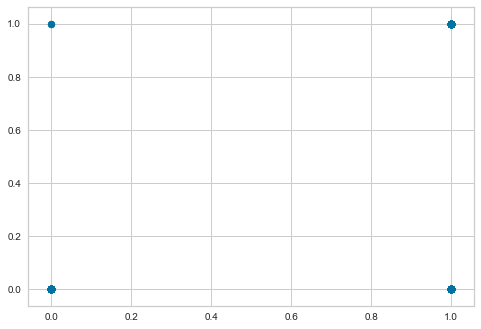

In [64]:
plt.scatter(y_valid, prediction)

# train:test=75:25 (counts<6, binary, dummy)

In [185]:
SEASON = pd.get_dummies(NEW['season'])
WORKDAY = pd.get_dummies(NEW['WORKDAY'])
new_x = pd.concat([x,SEASON,WORKDAY],axis = 1)

In [186]:
x_train, x_valid, y_train, y_valid = train_test_split(new_x, y, test_size=0.25)

In [187]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.25)

LRmodel = LogisticRegression()
LRmodel.fit(x_train, y_train)

validation = LRmodel.predict_proba(x_valid)
prediction = predict(validation)

In [188]:
from sklearn import metrics
print(metrics.mean_squared_error(y_valid, prediction))
np.sqrt(metrics.mean_squared_error(y_valid, prediction))

0.05357419926853596


0.23146101025558485

In [189]:
from sklearn.metrics import accuracy_score
accuracy_score(y_valid, prediction)

0.946425800731464

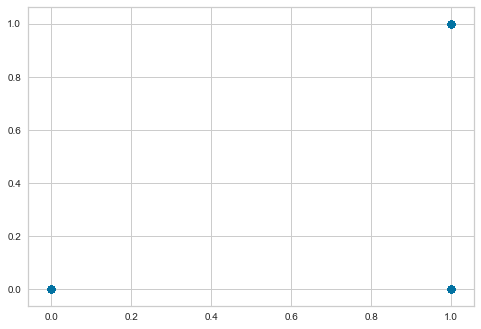

In [72]:
plt.scatter(y_valid, prediction)

# poisson linear model

# train:test=80:20 (non - dummy)

In [127]:
X_train, X_test, y_train, y_test = train_test_split(data_new_x, data_new_y, test_size=0.2)

In [128]:
TR=pd.concat([X_train, y_train], axis=1, sort=False)
TE=pd.concat([X_test, y_test], axis=1, sort=False)

In [129]:
from patsy import dmatrices
import statsmodels.api as sm

formula = 'counts~COUNT_BY_POPULATION+INCOME+percentage+Walk_Score+Bike_Score+WORKDAY+Area+ELEVATION+PRCP+TMAX+season'

response, predictors = dmatrices(formula, TR, return_type='dataframe')
po_results = sm.GLM(response, predictors, family=sm.families.Poisson()).fit()
print(po_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 counts   No. Observations:               144366
Model:                            GLM   Df Residuals:                   144354
Model Family:                 Poisson   Df Model:                           11
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -4.3892e+05
Date:                Mon, 10 Jun 2019   Deviance:                   5.0370e+05
Time:                        16:45:35   Pearson chi2:                 7.80e+05
No. Iterations:                    17   Covariance Type:             nonrobust
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               4.5483      0.042    109.300      0.000       4.467       4.630
COUNT_BY_POPULATION     0

In [130]:
R, P = dmatrices(formula, TE, return_type='dataframe')
predictions =po_results.predict(P)

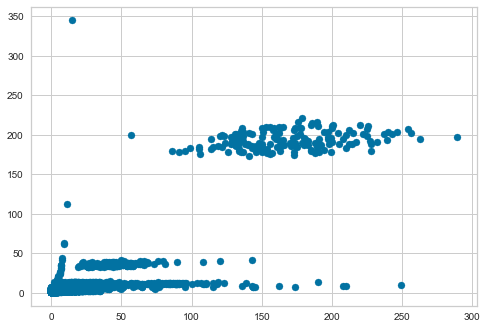

In [131]:
plt.scatter(TE['counts'],predictions)

In [132]:
np.sqrt(metrics.mean_squared_error(TE['counts'], predictions))

7.236334653174383

In [133]:
metrics.mean_squared_error(TE['counts'], predictions)

52.36453921273242

In [134]:
from sklearn.metrics import r2_score
r2_score(TE['counts'], predictions)

0.7231337421786368

# train:test=60:40 (non - dummy)

In [178]:
X_train, X_test, y_train, y_test = train_test_split(data_new_x, data_new_y, test_size=0.4)
TR=pd.concat([X_train, y_train], axis=1, sort=False)
TE=pd.concat([X_test, y_test], axis=1, sort=False)
from patsy import dmatrices
import statsmodels.api as sm

formula = 'counts~COUNT_BY_POPULATION+INCOME+percentage+Walk_Score+Bike_Score+WORKDAY+Area+ELEVATION+PRCP+TMAX+season'

response, predictors = dmatrices(formula, TR, return_type='dataframe')
po_results = sm.GLM(response, predictors, family=sm.families.Poisson()).fit()

R, P = dmatrices(formula, TE, return_type='dataframe')
predictions =po_results.predict(P)

In [179]:
np.sqrt(metrics.mean_squared_error(TE['counts'], predictions))

7.377517882086308

In [180]:
metrics.mean_squared_error(TE['counts'], predictions)

54.427770100503245

In [181]:
from sklearn.metrics import r2_score
r2_score(TE['counts'], predictions)

0.7227384608199307

# train:test=80:20 (dummy)

In [172]:
X_train, X_test, y_train, y_test = train_test_split(data_new_1_x, data_new_1_y, test_size=0.2)
TR=pd.concat([X_train, y_train], axis=1, sort=False)
TE=pd.concat([X_test, y_test], axis=1, sort=False)
from patsy import dmatrices
import statsmodels.api as sm

formula = 'counts~COUNT_BY_POPULATION+INCOME+percentage+Walk_Score+Bike_Score+WORKDAY+Area+ELEVATION+PRCP+TMAX+season'

response, predictors = dmatrices(formula, TR, return_type='dataframe')
po_results = sm.GLM(response, predictors, family=sm.families.Poisson()).fit()

R, P = dmatrices(formula, TE, return_type='dataframe')
predictions =po_results.predict(P)

In [173]:
np.sqrt(metrics.mean_squared_error(TE['counts'], predictions))

8.520032159367267

In [174]:
metrics.mean_squared_error(TE['counts'], predictions)

72.59094799665246

In [175]:
from sklearn.metrics import r2_score
r2_score(TE['counts'], predictions)

0.6439009582217925

# Random forrest model

# train:test=80:20 (non - dummy)

In [135]:
#X_train, X_test, y_train, y_test = train_test_split(data_new_2_x, data_new_2_y, test_size=0.2)
X_train, X_test, y_train, y_test = train_test_split(data_new_x, data_new_y,test_size=0.2)

In [136]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=20)

#Train the model using the training sets y_pred=clf.predict(X_test)

In [137]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [138]:
y_pred=clf.predict(X_test)

In [139]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9502659869223097

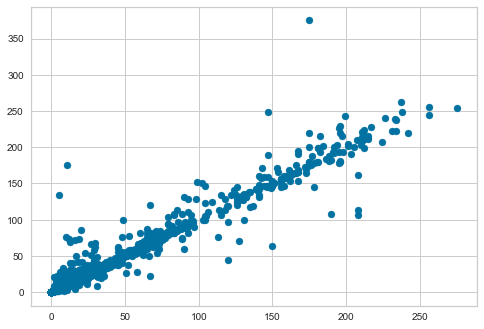

In [94]:
plt.scatter(y_pred,y_test)

In [140]:
from sklearn import metrics
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

3.5019949019173224
1.8713617774009712


In [38]:
pd.concat((pd.DataFrame(DA.iloc[:, 3:15].columns, columns = ['variable']), 
           pd.DataFrame(clf.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)[:20]

,variable,importance
11,COUNT_BY_POPULATION,0.556175
5,Area,0.101831
2,Walk_Score,0.053377
3,Bike_Score,0.046638
0,INCOME,0.046119
9,TMAX,0.045946
6,AQI_VALUE,0.045683
7,ELEVATION,0.037217
1,percentage,0.028898
8,PRCP,0.018300


# train:test=60:40 (non - dummy)

In [161]:
X_train, X_test, y_train, y_test = train_test_split(data_new_x, data_new_y,test_size=0.4)
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=20)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9450847833314862

In [162]:
from sklearn import metrics
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

6.788457275850604
2.6054668057472163


# train:test=80:20 (dummy)

In [176]:
X_train, X_test, y_train, y_test = train_test_split(data_new_1_x, data_new_1_y,test_size=0.2)
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=20)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9527873212900366

In [177]:
from sklearn import metrics
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

4.947190513133104
2.2242280712941973
